In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal 
import random
from sklearn.neighbors import KernelDensity
import seaborn as sns

### Q-1: What is the probability distribution of age in the insurance dataset?
#### Find out using the KDE method

In [7]:
insurance = pd.read_csv(r"D:\Jupyter\insurance_data.csv",index_col='index')
insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


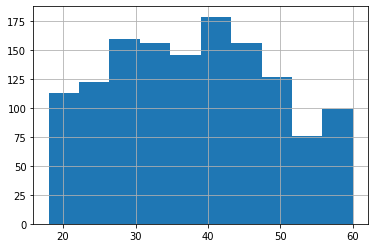

In [80]:
# distribution of data does not follow the famous distribution shapes hence we do non-parametric density estimation using KDE
insurance.age.hist()
plt.show()

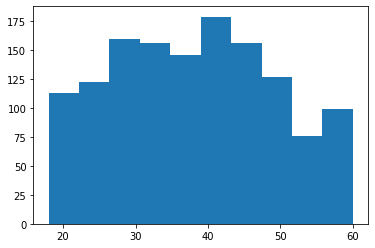

In [81]:
plt.hist(insurance.age)
plt.show()

In [82]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=2,kernel='gaussian')
data = insurance.age.dropna().values.reshape((len(insurance.age.dropna()),1))
model.fit(data)

KernelDensity(bandwidth=2)

In [86]:
sample = np.linspace(insurance.age.min(),insurance.age.max(),1000)
pdf_values = np.exp(model.score_samples(sample.reshape((len(sample),1))))

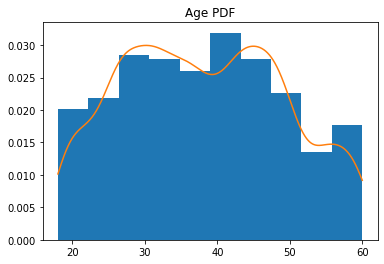

In [88]:
plt.hist(insurance.age,density=True)
plt.plot(sample,pdf_values)
plt.title('Age PDF')
plt.show()

### Q-2: What is the probability of a patient having a BMI greater than 30?

(array([ 30., 130., 232., 319., 288., 195.,  96.,  33.,  14.,   3.]),
 array([16.  , 19.71, 23.42, 27.13, 30.84, 34.55, 38.26, 41.97, 45.68,
        49.39, 53.1 ]),
 <BarContainer object of 10 artists>)

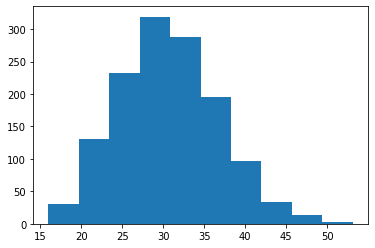

In [145]:
plt.hist(insurance.bmi)

In [146]:
sample_mean = insurance.bmi.mean()
sample_std = insurance.bmi.std()

In [147]:
# put values of mean and std in pdf of normal distribution
#fit the distribution with the above parameter
from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [148]:
sample = np.linspace(insurance.bmi.min(),insurance.bmi.max(),1000)

In [149]:
pdf_values = [dist.pdf(i) for i in sample]


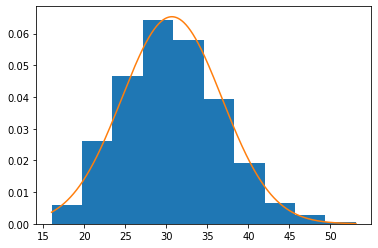

In [150]:
plt.hist(insurance.bmi,density=True)
plt.plot(sample,pdf_values)

In [152]:
sample = np.linspace(insurance.bmi[insurance.bmi > 30].min(),insurance.bmi[insurance.bmi > 30].max())
cdf_values = [dist.cdf(i) for i in sample]

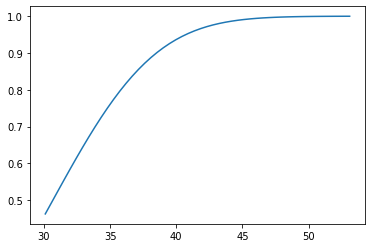

In [153]:
plt.plot(sample,cdf_values)

In [154]:
bmi_greater_than_30 = insurance[insurance['bmi'] > 30]
probability_bmi_greater_than_30 = len(bmi_greater_than_30) / len(insurance)
print(probability_bmi_greater_than_30)

0.5216417910447761


In [155]:
1 - dist.cdf(30)

0.5436144272589528

### Q-3: Plot distribution plot of claim for Smoker and non smoker. What changes you see in the plot?

<AxesSubplot: xlabel='claim', ylabel='Count'>

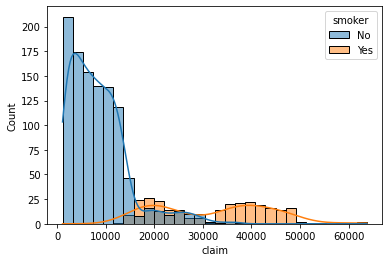

In [200]:
sns.histplot(insurance,x='claim',kde=True,hue='smoker')

In [276]:
smoker_claim = insurance.claim[insurance.smoker == 'Yes']
non_smoker_claim = insurance.claim[insurance.smoker == 'No']

(array([35., 54., 28., 10., 47., 49., 36., 10.,  2.,  3.]),
 array([12829.46 , 17923.557, 23017.654, 28111.751, 33205.848, 38299.945,
        43394.042, 48488.139, 53582.236, 58676.333, 63770.43 ]),
 <BarContainer object of 10 artists>)

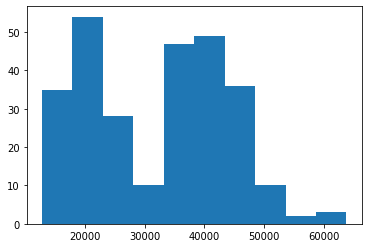

In [277]:
plt.hist(smoker_claim)

In [278]:
model = KernelDensity(bandwidth=1800,kernel='gaussian')

In [279]:
model.fit(smoker_claim.values.reshape((-1,1)))

KernelDensity(bandwidth=1800)

In [288]:
smoker_claim.shape

(274,)

In [289]:
sample = np.linspace(np.min(smoker_claim),np.max(smoker_claim),200)
pdf_values = np.exp(model.score_samples(sample.reshape((-1,1))))

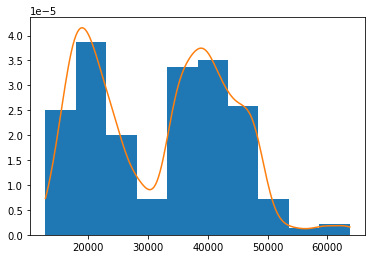

In [290]:
plt.hist(smoker_claim,density=True)
plt.plot(sample,pdf_values)

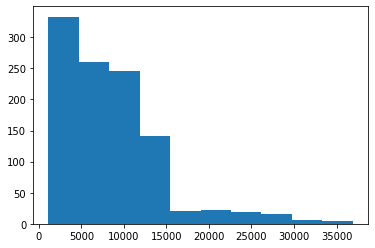

In [291]:
plt.hist(non_smoker_claim)
plt.show()

In [292]:
lam = 1/np.mean(non_smoker_claim)

In [293]:
lam

0.00011874902778410882

In [294]:
sample1 = np.linspace(non_smoker_claim.min(),non_smoker_claim.max(),900)

In [295]:
pdf_values1 = lam * np.exp(-lam * sample1)

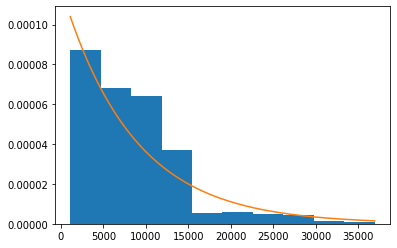

In [296]:
plt.hist(non_smoker_claim,density=True)
plt.plot(sample1,pdf_values1)
plt.show()

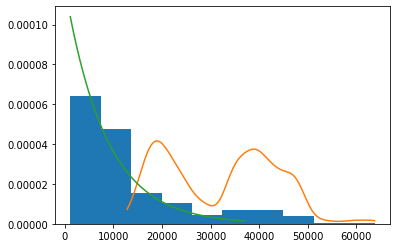

In [297]:
plt.hist(insurance.claim,density=True)
plt.plot(sample,pdf_values)
plt.plot(sample1,pdf_values1)
plt.show()

<AxesSubplot: xlabel='claim', ylabel='Count'>

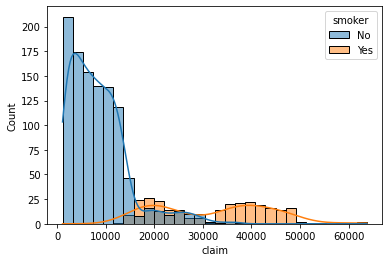

In [298]:
sns.histplot(insurance,x='claim',kde=True,hue='smoker')

### Q-4: Plot the 2D probability density plot of claim and age in the insurance dataset?

<AxesSubplot: xlabel='age', ylabel='claim'>

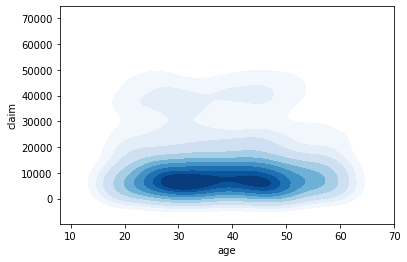

In [303]:
sns.kdeplot(data=insurance ,x='age',y='claim',fill=True,thresh=0.05,cmap="Blues")

### Q-5: How does the disribution of claim changes for different region? Plot density plot and note down the observations

<AxesSubplot: xlabel='claim', ylabel='Density'>

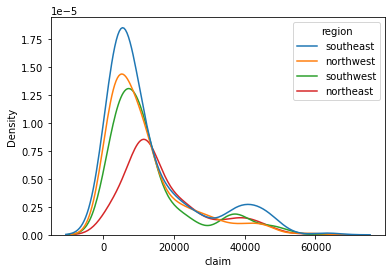

In [305]:
sns.kdeplot(data=insurance,x='claim',hue='region')

In [ ]:
# kdeplot represent probability density at claim amount 6000 - 10000 is higher than total claims 
# All regions follow multimodel distribution global peak or main peak is at 6k-10k and local peaks around 3800-4300
# southeast region shows higher probability density than rest other regions

In [307]:
insurance.region.value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

### Q6: Plot PDF and CDF of claim in insurance data

(array([538., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

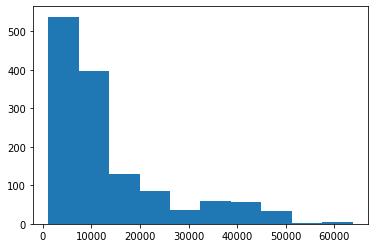

In [308]:
plt.hist(insurance.claim)

In [309]:
insurance.claim.describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<AxesSubplot: >

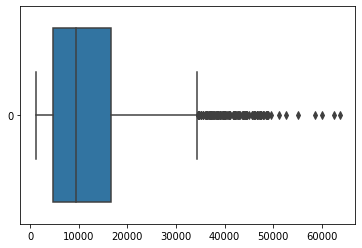

In [312]:
sns.boxplot(insurance.claim,orient='h')

In [335]:
 model = KernelDensity(bandwidth=2500,kernel='gaussian')

In [336]:
model.fit(insurance.claim.values.reshape((-1,1)))

KernelDensity(bandwidth=2500)

In [337]:
sample = np.linspace(insurance.claim.min(),insurance.claim.max(),1000)
pdf_val = np.exp(model.score_samples(sample.reshape((-1,1))))

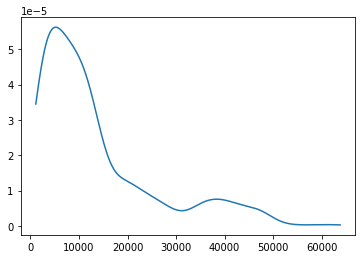

In [338]:
plt.plot(sample,pdf_val)
plt.show()

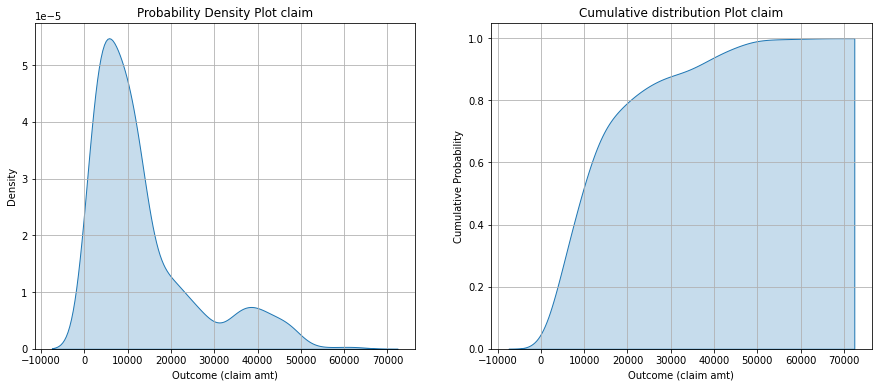

In [386]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(insurance.claim,fill=True)
plt.title('Probability Density Plot claim')
plt.xlabel('Outcome (claim amt)')
plt.grid(True)


plt.subplot(1,2,2)
sns.kdeplot(insurance.claim,cumulative=True,fill=True)
plt.title('Cumulative distribution Plot claim')
plt.xlabel('Outcome (claim amt)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


### Q-7: Given a probability density function f(x) = 2x for 0 <= x <= 1 and f(x) = 0 otherwise, compute the cumulative distribution function F(x) and plot it. Use this to find the probability that X is greater than 0.5.

In [371]:
sample = np.random.randn(1000)

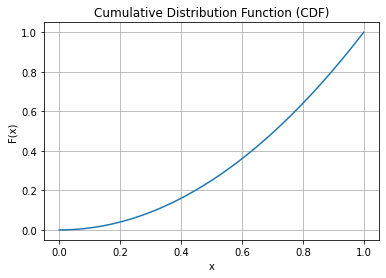

Probability that X is greater than 0.5: 0.75


In [388]:
# define probability distribution function
def pdf(x):
    if x >= 0 and x<=1:
        return 2*x
    else:
        return 0
# define CDF why it return x**2 ? we can get cdf by performing integration on pdf. f(x) = 2x hence x**2
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return x ** 2
    else:
        return 1
x = np.linspace(0,1,100)

# calculate cdf 
cdf_val = [cdf(i) for i in x]
plt.plot(x,cdf_val)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()

#finding probability of x greater than 0.5
p = 1 - cdf(0.5)
print("Probability that X is greater than 0.5:", p)

### Q-8: In a manufacturing process, the thickness of a certain material is known to be normally distributed with a mean of 1.2 mm and a standard deviation of 0.05 mm. What is the probability density function of the thickness? Plot the PDF and use it to compute the probability that the thickness is between 1.1 mm and 1.3 mm.

In [392]:
from scipy.integrate import quad

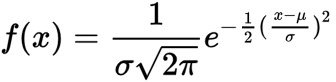

In [ ]:
f(x) = (1 / (σ * sqrt(2 * π))) * exp(-(x - μ)^2 / (2 * σ^2))

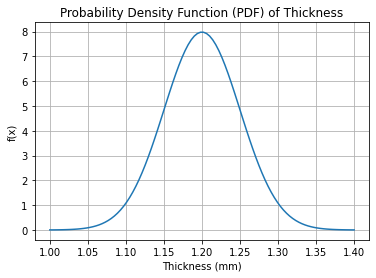

Probability that the thickness is between 1.1 mm and 1.3 mm: 0.9544997361036409


In [396]:
# Define the parameters of the normal distribution
mean = 1.2
std = 0.05

# Define the probability density function (PDF) for normal distribution
def pdf(x,mean,std):
    return (1/(std * np.sqrt(2*np.pi)))*np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Generate a range of x values from 1.0 mm to 1.4 mm
x = np.linspace(1.0, 1.4, 100)

# Calculate the corresponding PDF values
pdf_val = pdf(x, mean, std)

# Plot the PDF
plt.plot(x, pdf_val)
plt.xlabel('Thickness (mm)')
plt.ylabel('f(x)')
plt.title('Probability Density Function (PDF) of Thickness')
plt.grid(True)
plt.show()

#find area under the curve between 1.1 to 1.3 ie finding probability
lower_bound = 1.1
upper_bound = 1.3
p = quad(lambda x:pdf(x,mean,std),lower_bound,upper_bound)[0]
print("Probability that the thickness is between 1.1 mm and 1.3 mm:", p)

- <b>CDF<b><br>
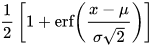

In [399]:
# Define the CDF function for normal distribution
def cdf(x, mean, std):
    return (1 + np.math.erf((x - mean) / (std * np.sqrt(2)))) / 2

cdf(1.3, mean, std) - cdf(1.1, mean, std)

0.9544997361036414

### Q-9 : A data scientist is investigating the distribution of customer ages in a retail store. She collects a sample of 100 ages and estimates the probability density function using kernel density estimation. What bandwidth should she choose to obtain the best estimate?

In [406]:
# Cross validation approach
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Generate a sample of 100 ages
ages = np.random.normal(loc=40, scale=10, size=100)

# Define the range of bandwidths to test
bandwidths = 10 ** np.linspace(-1, 1, 100)

# Define the parameters for the kernel density estimator
params = {'bandwidth': bandwidths, 'kernel': ['gaussian']}

# Create a GridSearchCV object to find the best bandwidth
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(ages.reshape(-1, 1))

# Extract the best bandwidth from the GridSearchCV object
best_bandwidth = grid.best_estimator_.bandwidth
print('Best bandwidth:', best_bandwidth)

Best bandwidth: 4.977023564332112


In [407]:
# Scott rule bandwidth
# h = 1.06 * sigma * n^(-1/5)
h = 1.06 * 10 * (100**(-1/5))
print("Scott rule bandwidth:", h)

Scott rule bandwidth: 4.219936007867071
